# Data Science Research Methods - Report 1
candidateno=251046

Data Analysis for upcoming SussexBudgetProduction movie and recommendations for a possible box office hit.

### Exploratory Data Analysis :
We will be starting our analysis by performing following Exploratory Data Analysis,


*   Eliminating empty rows
* Remove duplicate rows
* Add additional column for showing Profit 
* Split the dataset based on budget

For supporting my analyis, we can refer the following graphs ,


1.   'Budget' vs 'profit'
2.   'Genres' vs 'Profit'
3. 'IMDB Score' vs 'gross'
4. 'Director' vs 'profit'
5. 'Content Rating' vs 'Profit'







In [2]:
#We are importing the file movie_metadata.csv for our prosessing
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
filename="/content/drive/My Drive/Colab Notebooks/movie_metadata.csv"


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


                 color       director_name  ...  movie_facebook_likes       profit
4707   Black and White       Daniel Myrick  ...                     0  140470114.0
4530             Color    John G. Avildsen  ...                     0  116275247.0
4674             Color        George Lucas  ...                     0  114223000.0
4793             Color           Oren Peli  ...                 12000  107902283.0
4485             Color           James Wan  ...                     0   53953403.0
4413             Color           James Wan  ...                 60000   52491137.0
4545             Color  William Brent Bell  ...                 12000   52245055.0
2492             Color      John Carpenter  ...                 12000   46700000.0
4791             Color          Jared Hess  ...                     0   44140956.0
4725             Color            Joe Camp  ...                   816   39052600.0
4723             Color       Alex Kendrick  ...                     0   32951479.0
2242

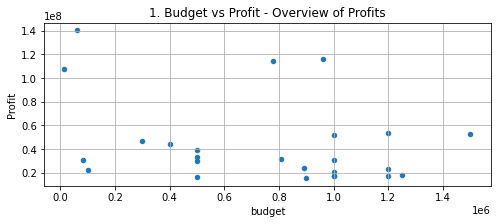

In [3]:
#Calling the predefined classes
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the csv file from the above file location
df_mov = pd.read_csv(filename)
#Replacing emply cells with nan
df_mov.replace('', np.nan, inplace=True)
df_mov.dropna(subset=['gross','genres','budget','language'], inplace=True)

#Removing duplicate rows based on movie title and year
df_mov.drop_duplicates(subset=['title_year', 'movie_title'], keep='first', inplace=True)


#Creating new column 'profit' by substracting columns 'budget' from 'gross'
df_mov['profit']=df_mov['gross']-df_mov['budget']
#Sorting the DataFrame with 'profit' column as reference and in descending order
df_mov.sort_values(by=['profit'],ascending=False, inplace=True)

#Storing the required rows of profit and loss making films, considering our given budget of 1.5 million
df_mov_final=df_mov[df_mov.budget <= 1500000]
#print(df_mov_final)

df_profit=df_mov_final[df_mov_final.profit > 0]
df_loss=df_mov_final[df_mov.profit < 0]

#Getting the top 25 profitable movie details
df_top25=df_profit.head(25)
print(df_top25)

#Getting the top 25 loss making movie details
df_top25_loss=df_loss.tail(25)
print(df_top25_loss)

#Ploting 'budget' vs 'profit'
df_top25.plot(x ='budget', y='profit', kind = 'scatter',figsize=(8,3))
plt.title("1. Budget vs Profit - Overview of Profits")
plt.grid(True)
plt.ylabel("Profit")
plt.show()

##### We are able to interpret the relation between budget and profit's by plotting scatter graphs. Summary from the graph is that, there is no clear evidence of high budget movies making more profits as some of the lower budget films are infact showing highest profit.

                                           color  ...  profit
genres                                            ...        
Adventure|Biography|Drama|Horror|Thriller      1  ...       1
Adventure|Family|Romance                       1  ...       1
Biography|Drama|Romance                        1  ...       1
Comedy                                         1  ...       1
Comedy|Crime|Mystery                           1  ...       1
Comedy|Drama|Music                             1  ...       1
Drama                                          2  ...       2
Drama|Romance                                  1  ...       1
Drama|Sport                                    1  ...       1
Fantasy|Horror                                 1  ...       1
Fantasy|Horror|Mystery|Thriller                1  ...       1
Horror                                         4  ...       4
Horror|Mystery|Sci-Fi|Thriller                 1  ...       1
Horror|Mystery|Thriller                        4  ...       4
Horror|S

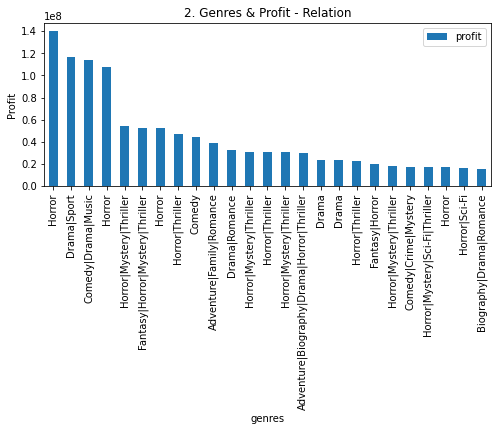

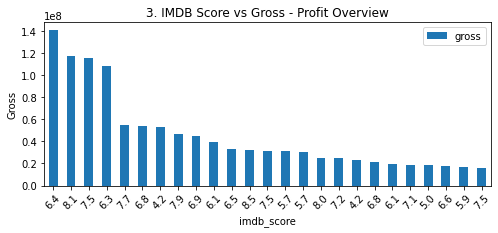

In [4]:
#Printing a count of all the genres occuring in the list
print(df_top25.groupby(by='genres').agg('count'))
#print(df_top25_loss.groupby(by='genres').agg('count'))

#Ploting 'Genres' vs 'Profit'
df_top25.plot(x ='genres', y='profit', kind = 'bar',rot=90,figsize=(8,3))
plt.title("2. Genres & Profit - Relation")
plt.ylabel("Profit")
plt.show()

#Ploting 'IMDB Score' vs 'gross'
df_top25.plot(x ='imdb_score', y='gross', kind = 'bar',rot=45,figsize=(8,3))
plt.title("3. IMDB Score vs Gross - Profit Overview")
plt.ylabel("Gross")
plt.show()
#df_fin.columns

#####We now continue our exploration by plotting relation between 'genres' and 'profit'.We also plot a bar graph to observe the pattern of IMDB Score vs Gross and we realise that there is no relation between them. We do the hypothesis test to prove the same.
The idea behind this exercise is to look at movie performances in terms of profit by figuring out what Genres are best performing minding our budget range.
From the 'Genres & Profit - Relation' graph, we can see that the 'Horror' genre repeats 3 times among the top 10 list, along with 'Horror|Mystery|Thriller' occuring 4 times.



In [5]:
import scipy.stats as stats
#Calculating the mean and standard deviation of the gross values
df_gross=df_mov_final['gross']
df_score=df_mov_final['imdb_score']
#print("The mean of Gross = {}".format(df_mean_gross))
#print("The mean of the IMDB Score = {}".format(df_mean_score))

pearsoncc=stats.pearsonr(np.array(df_score),np.array(df_gross))
print("Pearson's correlation coefficient is {}".format(pearsoncc))

#df_stdev_gross=df_top25['gross'].std()
#print("The Standard deviation of the Gross = {}".format(df_stdev_gross))
#print("The mean of the Gross = {}".format(df_mean_gross))


#Calculation the mean and standard deviation of the IMDB Score values
df_mean_score=df_top25['imdb_score'].mean
df_stdev_score=df_top25['imdb_score'].std()
#print("The Standard deviation of the IMDB Score = {}".format(df_stdev_score))
#print("The mean of the IMDB Score = {}".format(df_mean_score))

df_genre=df_mov_final[df_mov_final['genres'] == 'Horror|Mystery|Thriller']
df_genre

Pearson's correlation coefficient is (0.062005721999834465, 0.3020518299770804)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4485,Color,James Wan,287.0,103.0,0.0,651.0,Monica Potter,2000.0,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,299127,5161,Shawnee Smith,0.0,chained|flashback|killer|serial killer|surpris...,http://www.imdb.com/title/tt0387564/?ref_=fn_t...,1509.0,English,USA,R,1200000.0,2004.0,878.0,7.7,1.85,0,53953403.0
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1885,John Gavin,2.0,money|motel|rain|shower|theft,http://www.imdb.com/title/tt0054215/?ref_=fn_t...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000,31193053.0
4534,Color,Levan Gabriadze,270.0,83.0,6.0,142.0,Renee Olstead,707.0,31537320.0,Horror|Mystery|Thriller,Shelley Hennig,Unfriended,44329,1565,Heather Sossaman,0.0,blender|computer screen|secret|skype|webcam,http://www.imdb.com/title/tt3713166/?ref_=fn_t...,309.0,English,USA,R,1000000.0,2014.0,305.0,5.7,1.85,13000,30537320.0
4475,Color,Steve Miner,242.0,87.0,49.0,59.0,Adrienne King,309.0,19100000.0,Horror|Mystery|Thriller,Betsy Palmer,Friday the 13th Part 2,39690,707,Amy Steel,0.0,ice pick|jason voorhees|lake|pitchfork|shack,http://www.imdb.com/title/tt0082418/?ref_=fn_t...,394.0,English,USA,R,1250000.0,1981.0,121.0,6.1,1.85,0,17850000.0


The 'Horror|Mystery|Thriller' genre seems to be profitable and within our budget. Taking a detailed look at the above list more closely, we can see that there are actually plenty of films that meets the criteria of budget and is not running into a loss.


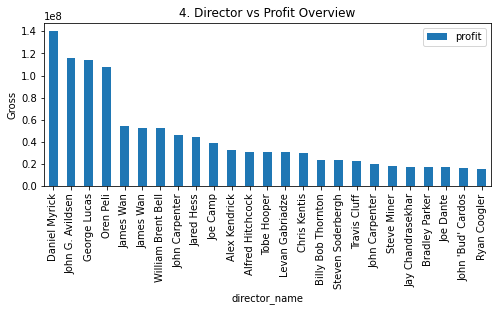

In [6]:
#List out sorted movie database by top25 grossing directors
dir_df=df_mov_final.loc[:,['director_name','profit','gross','genres','budget','content_rating']]
dir_df.sort_values(by=['profit'],ascending=False, inplace=True)
dir_df[0:25]

#Ploting 'Director' vs 'profit'
dir_df[0:25].plot(x ='director_name', y='profit', kind = 'bar',rot=90,figsize=(8,3))
plt.title("4. Director vs Profit Overview")
plt.ylabel("Gross")
plt.show()

##### Now, we shortlist the names of top 25 directors based on the profitability of the movie.
We use bar charts for visualising the same and notice that James Wan is among the top 5. His name also appears in the above list of genre 'Horror|Mystery|Thriller'.


                 color       director_name  ...  movie_facebook_likes       profit
4707   Black and White       Daniel Myrick  ...                     0  140470114.0
4793             Color           Oren Peli  ...                 12000  107902283.0
4485             Color           James Wan  ...                     0   53953403.0
4545             Color  William Brent Bell  ...                 12000   52245055.0
2492             Color      John Carpenter  ...                 12000   46700000.0
2242   Black and White    Alfred Hitchcock  ...                 18000   31193053.0
3278             Color         Tobe Hooper  ...                     0   30775468.0
4534             Color     Levan Gabriadze  ...                 13000   30537320.0
4726             Color        Chris Kentis  ...                     0   30000882.0
3821             Color  Billy Bob Thornton  ...                     0   23585416.0
4484             Color   Steven Soderbergh  ...                  2000   23541700.0
4956

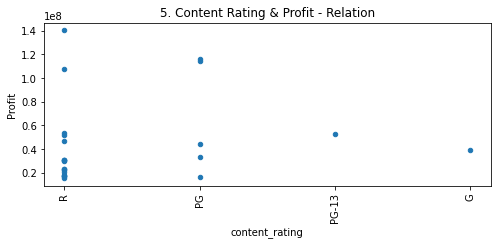

In [7]:
#Listing out top 25 movies based on content rating
df3=df_mov_final[df_mov_final['content_rating'] == 'R']
r_rated=df3.sort_values(by='profit',ascending=False)[0:25]
print(r_rated)

#Ploting 'Content Rating' vs 'Profit'
df_top25.plot(x ='content_rating', y='profit', kind = 'scatter',rot=90,figsize=(8,3))
plt.title("5. Content Rating & Profit - Relation")
plt.ylabel("Profit")
plt.show()

##### Now, we check if there is any relation between profit and content rating.
We use scatter plot for visualising the same and notice that there is infact a positive relation. The most points are coinciding on the category line 'R'.
##### Finally, we bring together every insights gained from above steps to come up with best recommendation to make the upcoming movie a profitable one.

## Hypothesis Testing
####"If Movie's Box office Collection is related to IMDB Scores, then films having higher IMDB scores will have better Box office Collection."
##### In order to test the above hypothesis, we consider the IMDB ratings of all movies in our database which fits our budget of 1.5 M.
##### WE define our Null Hypothesis, H0 : IMDB ratings are not related to Movie's Box office Collection
##### and our Alternative, H1 : IMDB ratings are related to Movie's Box office Collection 
###### Here, sample size n=279, sample mean of Gross = 14.05, sample mean of Gross = 140530114 and sample mean of IMDB score =6.4.
###### We assume the null hypothesis is true, and then we compute the probability value by using Pearson's correlation.

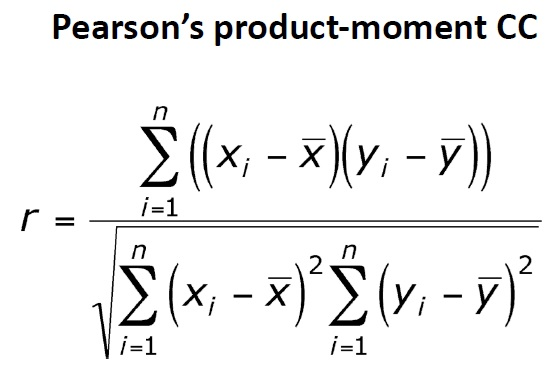
                                                      
Obtained Pearson's correlation coefficient (r) = 0.062 and p-value(probablility value) = 0.302.
We calculated the above values using the inbuilt scipy library and find that our obtained p-value is greater than 0.05.Hence, this test cannot be considered significant and we are not able to reject the null hypothesis H0.This means that there is no linear relation between the IMDB Scores and Movie Box office collection. The final conclusion is that 'IMDB ratings are not related to Movie's Box office Collection' and we move forward with our analysis.

# Summary

We examined the imdb data file to look for appropriate movies for upcoming SussexBudgetProductions to make a profitable collection. We start our exploratory data analysis by eliminating empty rows, remove duplicate rows, add additional column for showing Profit and finally split the dataset based on the given budget 1.5 million.

This process is continued with generating a list of top 25 profitable as well as loss making movies within our budget.We first examine whether any relation exisits between profit and IMDB ratings, which turned out to be baseless. Then we checked if any specific genre of film was generally accepted and could be made within the proposed budget. Here, we found that the films of the genre "Horror|Mystery|Thriller" met the criteria of budget and being profitable most of the times. We could see 4 movies as example of this type of film, and hence inferences we can draw from this insigh is pretty solid.

We also checked if content rating was a deciding factor for profit and this turned out to be actually true.We also checked the best possible director to make the movie a profitable one.

Based on the data analyses, I recommend that the studio should make a film in the genre of "Horror|Mystery|Thriller" with James Wan as director and in English to release in USA market.The reason to choose 'English' language and the suggestion to release in the 'USA' region is that, after oberving the lists of highest grossing films, the highest number of grossing films are under the USA and English columns. 

We also take a look at last movie produced by the company, which was a comedy-action-thriller with a budget of 500K. We are not able to see the  genre 'comedy-action-thriller' in any of our earlier analysis (even though the budget was 1/3rd of the current one). 

Since there is a concreate evidence that none of the movies in this specific parameter ran into a loss, chances of this movie being profitable is highly plausible.


In [1]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import io
from nbformat import current

filepath="/content/drive/My Drive/Colab Notebooks/Report1_template.ipynb"
#filepath="NLassignment2021.ipynb"
question_count=0

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:#
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Submission length is 927
